# #100Viz 18 - Rios Draft

Visualizando rios, arroyos y canales de Mexico.<br>
Fuente: 
* (Hidrografía) INEGI - Data source: INEGI - http://www.beta.inegi.org.mx/app/mapas/ 
* (Estados de México) ArcGIS - https://www.arcgis.com/home/item.html?id=ac9041c51b5c49c683fbfec61dc03ba8

In [1]:
import geopandas as gpd
import altair as alt
from pathlib import Path
import json

### Loading the data

We'll need to layer two maps: a base map with the states outlines and another with the hydrography data.

In [2]:
states_path = Path("../data/raw/mexstates/mexstates.shp")

states = gpd.read_file(states_path)

states.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ..."
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,..."
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ..."
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...


In [3]:
hidrografia_path = Path("../data/raw/hidrografia/conjunto_de_datos/red_hidrografica_250k.shp")

hidrografia = gpd.read_file(hidrografia_path)

hidrografia.head()

,FNODE_,TNODE_,LENGTH,REDHIDRO_,REDHIDRO_I,FC,NOMBRE,ORDEN,C_DESAPA,TIPO,Ter_Gen,geometry
0,9,8,2098.525,1,1,3180,None,0,No aplica,Real,Canal,"LINESTRING (1212167.375 2348835, 1210732.375 2..."
1,10,6,584.116,2,2,3271,None,3,No aplica,Real,Arroyo,"LINESTRING (1161384 2348832.75, 1161386.75 234..."
2,13,9,6781.563,3,3,3180,None,0,No aplica,Real,Canal,"LINESTRING (1218940.375 2348740.25, 1218829.5 ..."
3,18,13,4725.515,4,4,3180,None,0,No aplica,Real,Canal,"LINESTRING (1223663.125 2348628.25, 1223015.5 ..."
4,19,17,2006.336,5,5,3180,None,0,No aplica,Real,Canal,"LINESTRING (1241385.875 2348626.25, 1239667.5 ..."


`Ter_Gen` contiene los valores:
* Canal
* Arroyo
* Río
* None

`Python` utiliza la palabra `None` para representar la falta de información, entonces tenemos que cambiar ese valor en nuestra tabla por otro.

In [4]:
hidrografia['Ter_Gen'] = hidrografia['Ter_Gen'].fillna("X")

Para agregar etiquetas con su nombre a cada estado podemos crear "centros" de la columna de geometría con `geopandas`

In [5]:
states['centroid_lon'] = states['geometry'].centroid.x
states['centroid_lat'] = states['geometry'].centroid.y

Eventualmente, si quieres mover estas etiquetas puedes modificar estas columnas.

In [6]:
states_data = json.loads(states.to_json())

with open("../data/interim/states.geojson", "w", encoding = 'utf-8') as file:
    json.dump(states_data, file, indent=4)

In [7]:
#make sure projections match
hidrografia=hidrografia.to_crs({'init': 'epsg:4326'})

for valor in hidrografia['Ter_Gen'].unique():
    datos = json.loads(hidrografia[hidrografia['Ter_Gen'] == valor].to_json())

    with open(f"../data/interim/hidrografia_{valor}.geojson", "w") as archivo:
        json.dump(datos, archivo, indent=4)

***
Visualizaciones en `Matplotlib`

In [8]:
%matplotlib inline

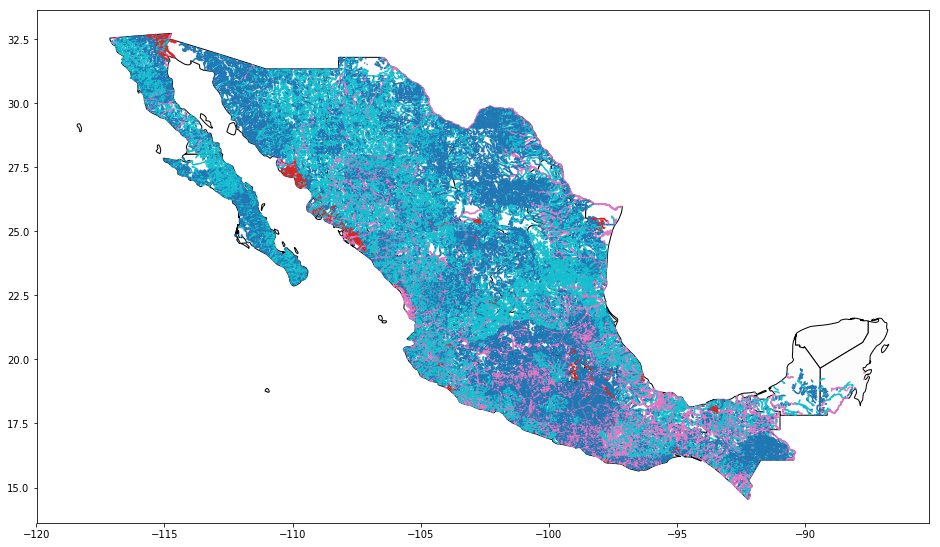

In [9]:
base = states.plot(color='#FCFCFC', edgecolor='black', figsize = (16,18));

hidrografia.plot(ax = base, column='Ter_Gen');

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

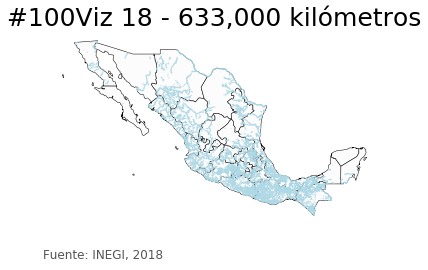

In [11]:
fig, ax = plt.subplots()
#fig = figure(num=None, figsize=(32, 32), dpi=300, facecolor='w', edgecolor='k')
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

hidrografia[hidrografia['Ter_Gen']=='Río'].plot(ax=ax, edgecolor='lightblue',linewidth=1, figsize = (32,32))

states.plot(ax=ax, color='#FCFCFC', edgecolor='black', linewidth=0.5, figsize=(32,32))

ax.figsize = (32,32)
ax.axis('off')

# add a title
ax.set_title('#100Viz 18 - 633,000 kilómetros', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Fuente: INEGI, 2018',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.show();

***
Borradores y otras ideas

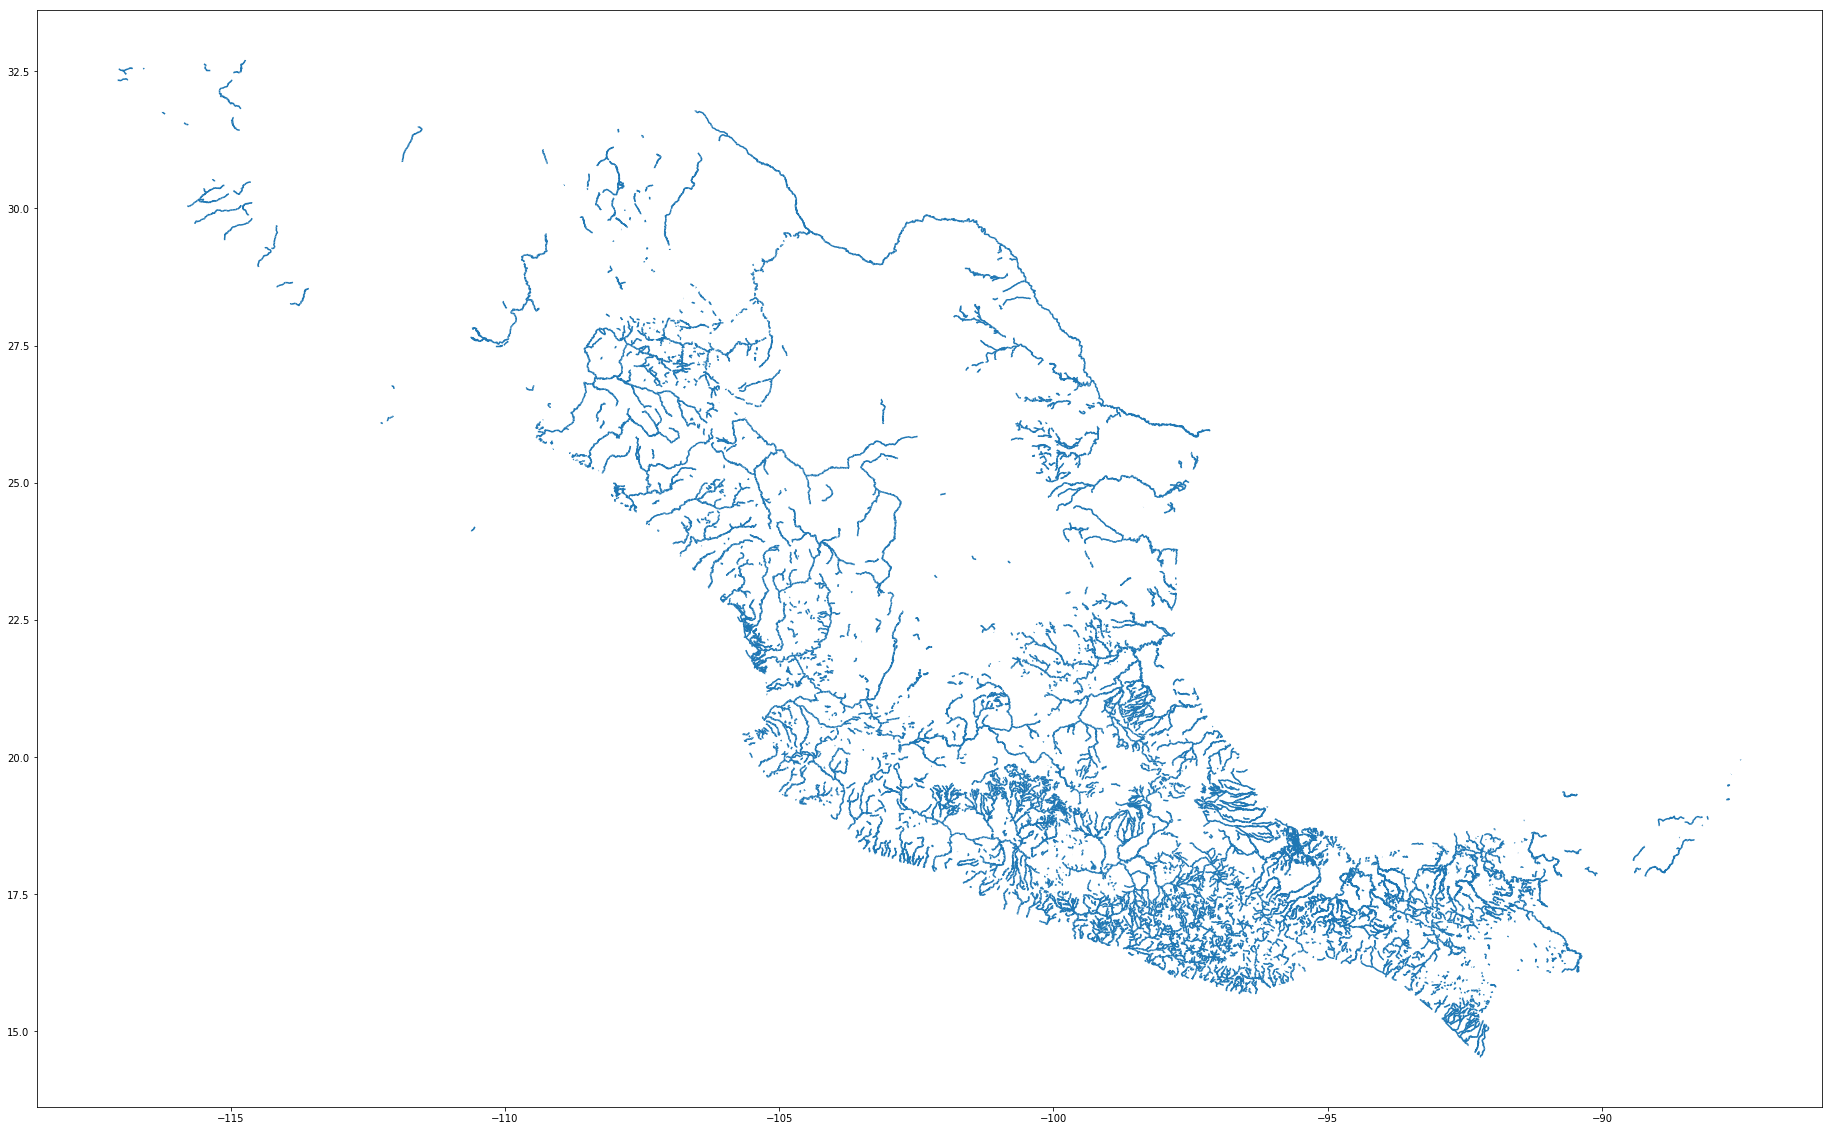

In [12]:
hidrografia[hidrografia['Ter_Gen']=='Río'].plot(figsize=(32,32));

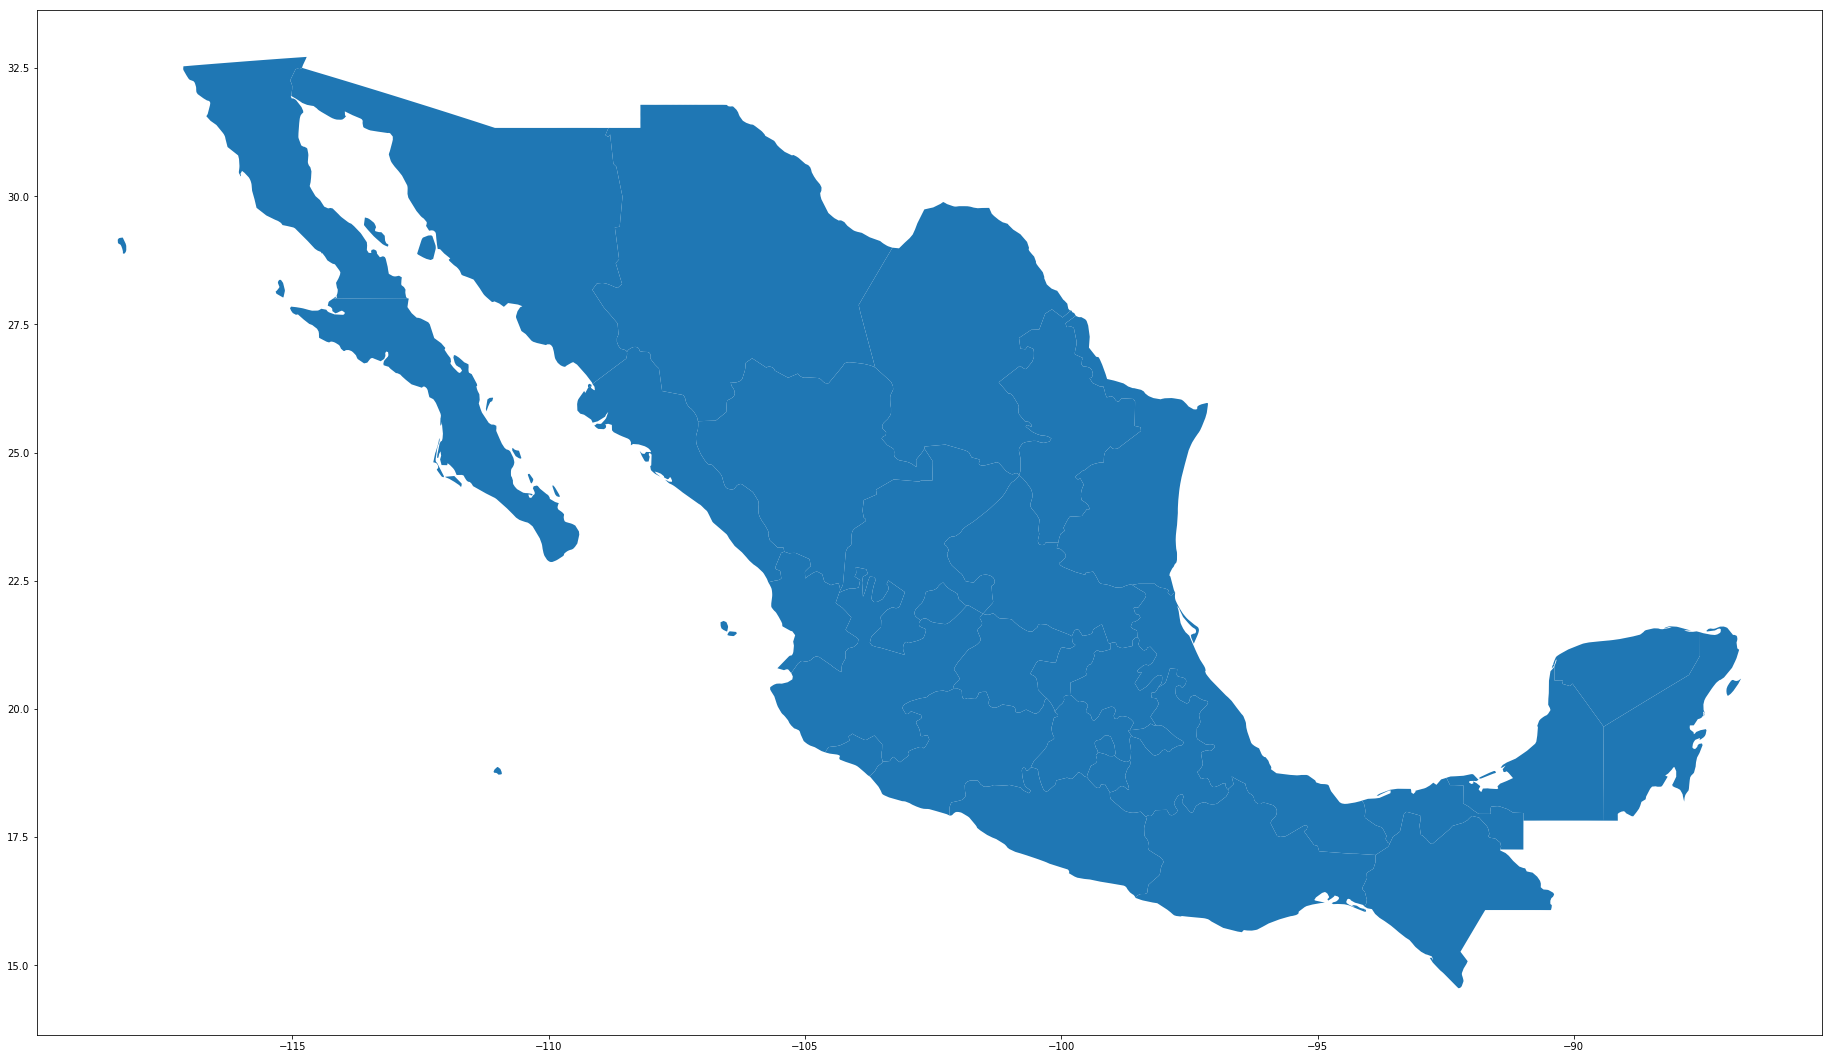

In [13]:
states.plot(figsize=(32,32))